<a href="https://colab.research.google.com/github/cerenyildizdag/IE423/blob/IE423/yildizdagcerentask6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfBF=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
dfBF.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
dfBF.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.969240e+05,496923.000000,496923.000000,496923.000000,342510.000000,151835.000000,496923.000000
mean,1.002983e+06,8.083975,0.408665,5.297173,9.842238,12.663826,9330.825796
std,1.713741e+03,6.523967,0.491588,3.750572,5.087088,4.126385,4980.595366
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001489e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5865.000000
50%,1.003021e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004399e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12070.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
dfBF.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            154414
Product_Category_3            345089
Purchase                           1
dtype: int64

In [ ]:
dfBF.nunique()

User_ID                        5891
Product_ID                     3612
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17816
dtype: int64

In [ ]:
dfBFGroup = (dfBF.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'],as_index=False).agg({'User_ID':'value_counts','Purchase':'sum'}).rename(columns={'User_ID':'Count'})
            )

dfBFGroup

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Count,Purchase
0,F,0-17,10.0,A,2,0.0,33,325291.0
1,M,55+,16.0,C,4+,0.0,71,742268.0
2,M,26-35,15.0,A,3,0.0,28,322004.0
3,M,46-50,7.0,B,2,1.0,12,186999.0
4,M,26-35,20.0,A,1,1.0,95,732184.0
...,...,...,...,...,...,...,...,...
5886,F,26-35,15.0,B,4+,1.0,430,3407617.0
5887,F,46-50,1.0,C,4+,0.0,109,1002513.0
5888,F,55+,1.0,C,2,0.0,7,60947.0
5889,F,46-50,0.0,B,4+,1.0,67,554504.0


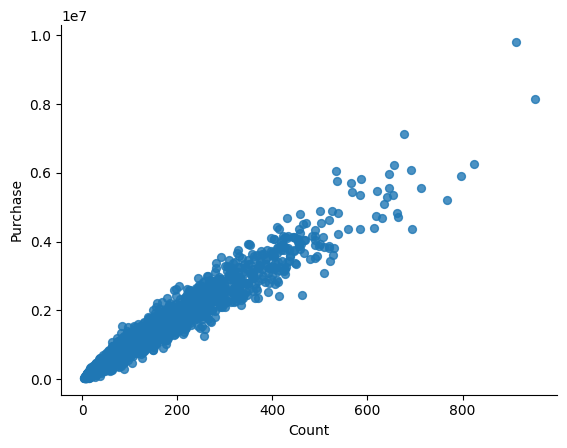

In [ ]:
# @title Count vs Purchase

from matplotlib import pyplot as plt
dfBFGroup.plot(kind='scatter', x='Count', y='Purchase', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

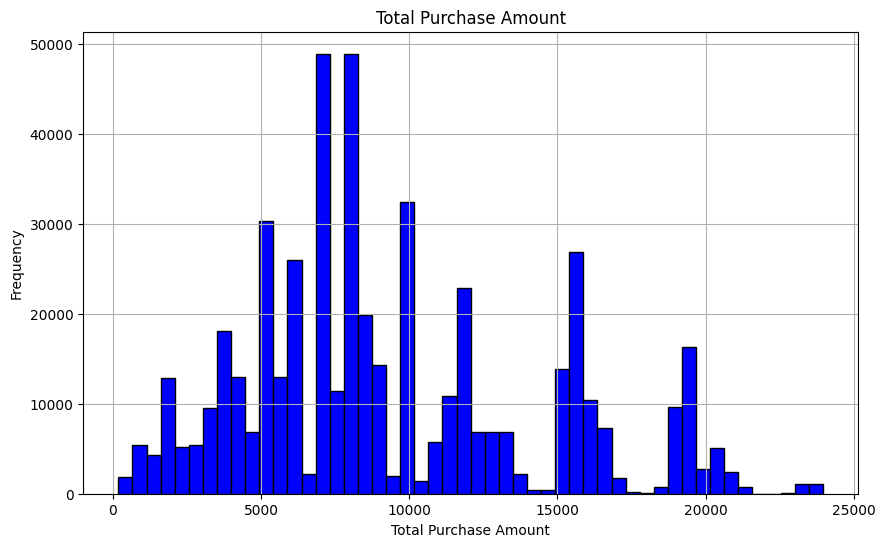

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(dfBF["Purchase"], bins=50, color='blue', edgecolor='black')
plt.title('Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=19)

In [ ]:
kmeans.fit(dfBFGroup[['Purchase', 'Count']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=19)

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

IndexError: index 1 is out of bounds for axis 1 with size 1

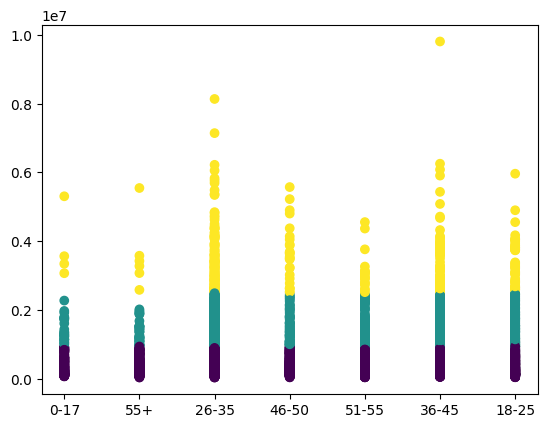

In [ ]:
X = dfBFGroup[['Purchase', 'Age']]
kmeans_labels = kmeans.labels_
plt.scatter(X['Age'],X['Purchase'],c=kmeans_labels)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('K-Means Clustering')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


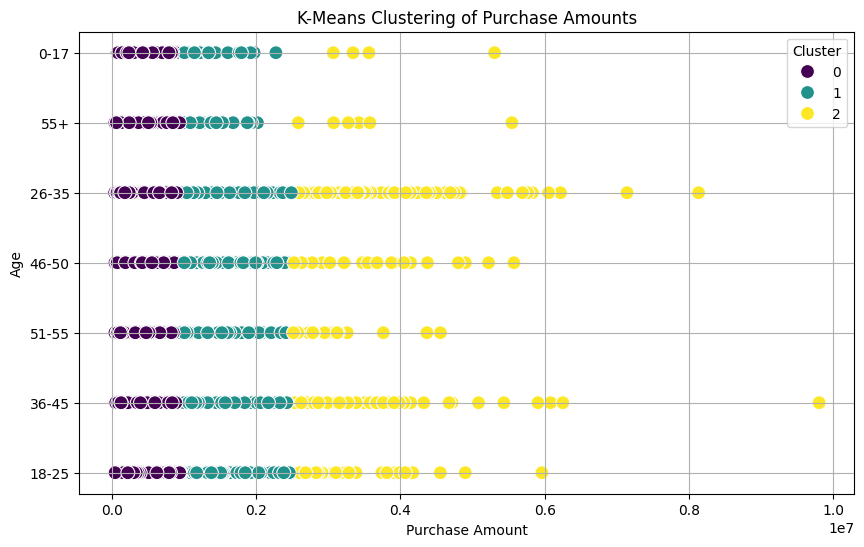

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
dfBFGroup['Cluster'] = kmeans.fit_predict(dfBFGroup[['Purchase']])

# Plot the clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase', y='Age', hue='Cluster', data=dfBFGroup, palette='viridis', s=100)
plt.title('K-Means Clustering of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Age')
plt.grid(True)

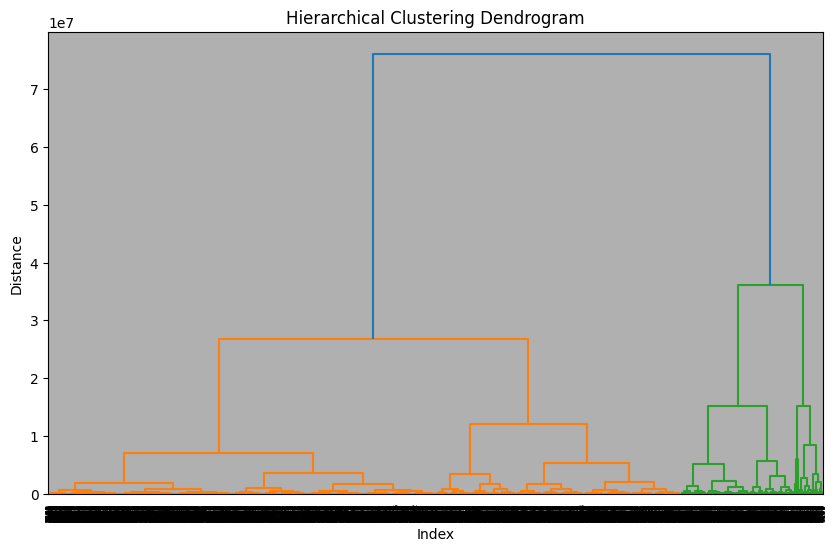

In [ ]:
Z = linkage(dfBFGroup[['Purchase']], method='ward')

dfBFGroup['Cluster'] = fcluster(Z, t=3, criterion='maxclust')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage

# Perform hierarchical clustering
mergings = linkage(dfBFGroup[['Purchase', 'Count']], method='ward')

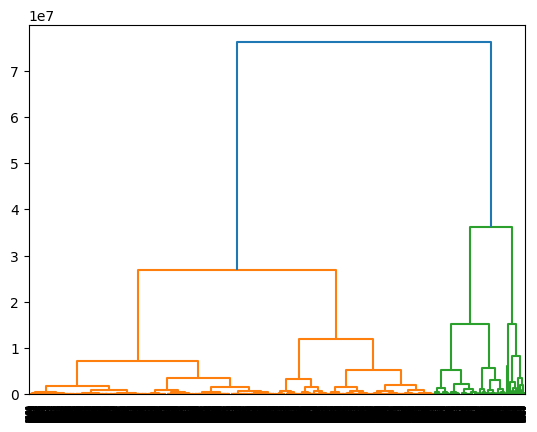

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
dendrogram(mergings)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Assign each data point to a cluster
labels = fcluster(mergings, 100, criterion='distance')

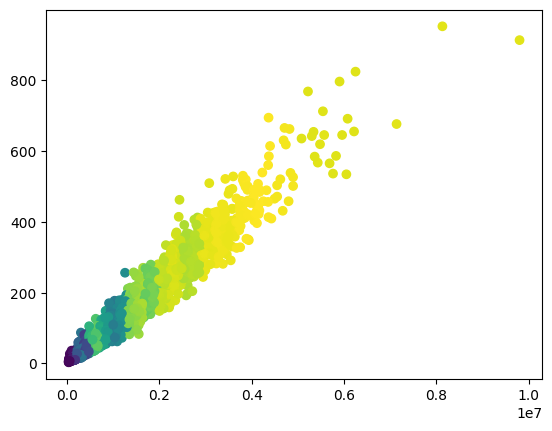

In [ ]:
plt.scatter(dfBFGroup['Purchase'], dfBFGroup['Count'], c=labels)
plt.show()

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

def hierarchical_clustering(data, method='ward', metric='euclidean', threshold=100):
  """
  Performs hierarchical clustering on the given data and visualizes the results.

  Args:
    data: DataFrame or array-like, the data to be clustered.
    method: str, the linkage method to use (e.g., 'ward', 'single', 'complete').
    metric: str, the distance metric to use (e.g., 'euclidean', 'manhattan').
    threshold: float, the threshold distance for cutting the dendrogram.

  Returns:
    labels: array-like, the cluster labels for each data point.
  """

  # Perform hierarchical clustering
  mergings = linkage(data, method=method, metric=metric)

  # Plot the dendrogram
  dendrogram(mergings)
  plt.show()

  # Assign each data point to a cluster
  labels = fcluster(mergings, threshold, criterion='distance')

  return labels

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_k(data, max_k):
  """
  Iterates over different values of k to determine the best silhouette score.

  Args:
    data: DataFrame or array-like, the data to be clustered.
    max_k: int, the maximum number of clusters to consider.

  Returns:
    best_k: int, the value of k with the best silhouette score.
    best_score: float, the best silhouette score.
  """

  best_k = 2
  best_score = -1

  for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    score = silhouette_score(data, labels)

    if score > best_score:
      best_k = k


In [ ]:
best_k, best_score = find_best_k(dfBFGroup[['Purchase', 'Count']], 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
best_k, best_score = find_best_k(dfBFGroup[['Purchase', 'Count']], 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(dfBFGroup[['Purchase', 'Count']])

DBSCAN()

In [ ]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
silhouette_score(X, dbscan)

NameError: name 'dbscan_labels_' is not defined

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [ ]:
print(n_clusters)

4242


In [ ]:
n_anomalies = list(labels).count(-1)

In [ ]:
print(n_anomalies)

0


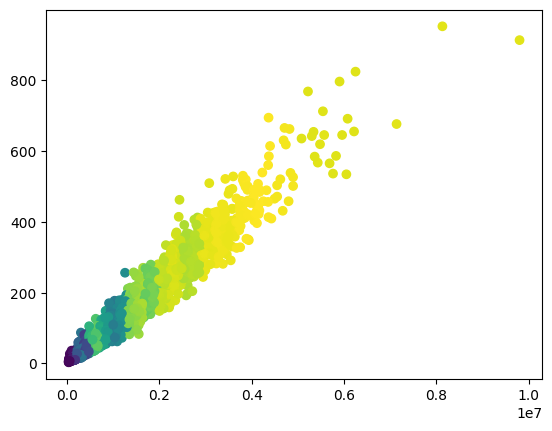

In [ ]:
# Assuming 'labels' is defined from your DBSCAN model
plt.scatter(dfBFGroup['Purchase'], dfBFGroup['Count'], c=labels)
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def dbscan_clustering(data, eps=0.5, min_samples=5):
  """
  Performs DBSCAN clustering on the given data and visualizes the results.

  Args:
    data: DataFrame or array-like, the data to be clustered.
    eps: float, the maximum distance between two samples for one to be considered
      as in the neighborhood of the other.
    min_samples: int, the minimum number of samples in a neighborhood for a point
      to be considered as a core point.

  Returns:
    labels: array-like, the cluster labels for each data point.
    n_clusters: int, the number of clusters.
    n_anomalies: int, the number of anomalies.
  """

  # Create a DBSCAN object with specified parameters
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)

  # Fit the model to your data
  dbscan.fit(data)

  # Get the cluster labels for each data point
  labels = dbscan.labels_

  # Calculate the number of clusters
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

  # Calculate the number of anomalies
  n_anomalies = list(labels).count(-1)

  # Visualize the clusters
  plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)
  plt.show()

  return labels, n_clusters, n_anomalies

Lets perform DBSCAN clustering with eps=0.5 and min_samples=5, and return the cluster labels, number of clusters, and number of anomalies.

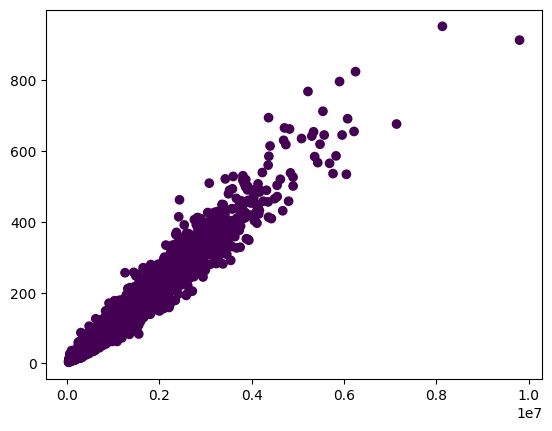

In [ ]:
labels, n_clusters, n_anomalies = dbscan_clustering(dfBFGroup[['Purchase', 'Count']])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def find_best_eps(data, eps_values, min_samples=5):
  """
  Iterates over different values of eps to determine the best silhouette score.

  Args:
    data: DataFrame or array-like, the data to be clustered.
    eps_values: list, the values of eps to consider.
    min_samples: int, the minimum number of samples in a neighborhood for a point
      to be considered as a core point.

  Returns:
    best_eps: float, the value of eps with the best silhouette score.
    best_score: float, the best silhouette score.
  """
  best_eps = None
  best_score = -1

  for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)
    labels = dbscan.labels_

    if len(set(labels)) > 1:
      score = silhouette_score(data, labels)
      if score > best_score:
        best_eps = eps
        best_score = score

  return best_eps, best_score

In [ ]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
best_eps, best_score = find_best_eps(dfBFGroup[['Purchase', 'Count']], eps_values)

In [ ]:
print('eps:', eps, '\t', 'Clusters:', n_clusters, '\t', 'Noise:', n_anomalies, '\t')

eps: 0.1 	 Clusters: 0 	 Noise: 5891 	
